# 1. 군집분석(Clustering)
  - 서로 유사한 정도에 따라 다수의 객체를 군집으로 나누는 작업 또는 이에  기반한 분석을 의미
  - 유사도가 높은 데이터끼리 그룹화(유사도 : 유클리드 거리식 이용)
  - 계측형 클러스터링과 비계층형 클러스터링으로 분류
  - 주요 알고리즘 : k-means, hierarchicol


**군집분석의 특징**
- 종속변수(y)가 없는 데아터 마이닝 기법(비지도학습)
- 유클리드 거리 기반 유사 객체 묶음(유사성 = 유클리드 거리)
- 전체적인 데이터 구조를 파악하는데 이용
- 분석결과에 대한 가설 검정 없음(타당성 검증 방법 없음)
- 계층적 군집분석(탐색적), 비계층적 군집분석(확인적)
- 데이터셋 -> 알고리즘 적용 -> 패턴 추출 -> 근거리 모형으로 군집 형성
- 척도 : 동간, 비율척도 -> 명목척도를 만듦

**유클리드 거리**
- 두 점 사이의 거리를 계산하는 방법

**계층적 군집분석**
- 유클리드 거리를 이용한 군집분석 방법
- 계층적으로 군집 결과 도출
- 탐색적 군집분석
- 계층적 군집분석의 결과
  - 덴도그램(Demdogram) : 표본들이 군을 형성하는 과정을 나타내는 나무 형식의 그림
- 군집 수는 사용자가 정할 수 있음
- 군집화 방식
  - 단일기준결합방식 : 각 군집에서 중심으로부터 거리가 가까운 것 1개씩 비교하여 가장 가까운 것까지 준집화
  - 완전기준결합방식 : 각 군집에서 중심으로부터 가장 먼 대상끼리 비교하여 가장 가까운 것끼리 군집화
  - 평균기준결합방식 : 한 군집 안에 속해있는 모든 대상과 다른 군집에 속해있는 모든 대상의 쌍 집합에 대한 거리를 평균 계산하여 가장 가까운 것끼리 군집화


**비계층적 군집분석(k-Means)**
- 계층적 군집분석보다 속도 빠름
- 군집의 수를 알고 있는 경우 이용
- k는 미리 정하는 군지바 수
- 확인적 군집분석
- 계층적 군집화의 결과에 의거하여 군집 수 결정
- 변수보다 관측대상 군집화에 많이 이용
- 군집의 중심(Cluster center)은 사용자가 정함

**k-평균(k-Means) 군집분석 알고리즘**
1. k값을 초기값으로 k개의 centroid 선정(랜덤)
2. 각 데이터 포인트를 가장 가까운 centroid에 할당
3. centeroid에 할당된 모든 데이터 포인트의 중심 위치 계싼(centroid 재조정)
4. 재조정된 centroid와 가장 가까운 데이터 포인트 할당
5. centroid 재조정이 발생되지 않을 때까지 3, 4단계 반복

-4번째 이미지

**K-Mneas 파라미터**
- n_clusters : 군집화할 개수(군집 중심점의  수), 가장 중요
- init : 초가 군집 중심점의 좌표
- max_iter : 최대 반복 횟수, 데이터의 중심점 이동이 없으면 종료

In [ ]:
# 라이브러리 로딩
!pip install mglearn
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
# 음수 표현
plt.rcParams['axes.unicode_minus'] = False
# 경고 무시
import warnings
warnings.filterwarnings('ignore')
# 매직명령어 : 시각화 결과가 포함되도록
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 10.3 MB/s eta 0:00:00


# 2. K-Means를 이용한 iris 데이터셋 군집화

- 4개의 피처 중 2개 꽃받침과 꽃잎의 길이와 너비
- n_cluster = 3

## 2-1. 데이터셋 로딩

In [ ]:
fruits = np.load('fruits_300.npy')

In [ ]:
fruits.shape     # 3차원(개수, 가로길이, 세로길이)

(300, 100, 100)

In [ ]:
fruits[0, 0, :] # 첫번째장 이미지 추출(RGB값)

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

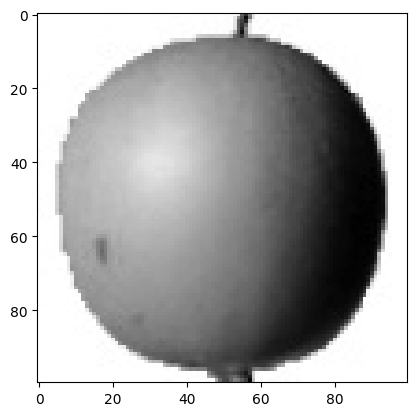

In [ ]:
plt.imshow(fruits[0], cmap = 'gray_r') # 이미지를 시각화하는 메서드
plt.show

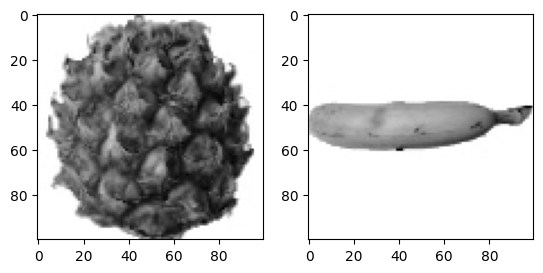

In [ ]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap = 'gray_r')
axs[1].imshow(fruits[200], cmap = 'gray_r')
plt.show()

In [ ]:
apple = fruits[0:100].reshape(-1, 100 * 100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[100:200].reshape(-1, 100*100)

In [ ]:
apple.shape

(100, 10000)

In [ ]:
apple.mean(axis = 1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

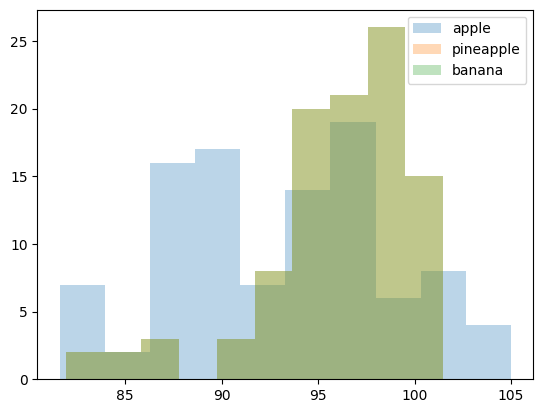

In [ ]:
plt.hist(np.mean(apple, axis = 1), alpha = 0.3)
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.3)
plt.hist(np.mean(banana, axis = 1), alpha = 0.3)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

# 3. K-means를 이용한 iris Clustering

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df = pd.DataFrame(iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


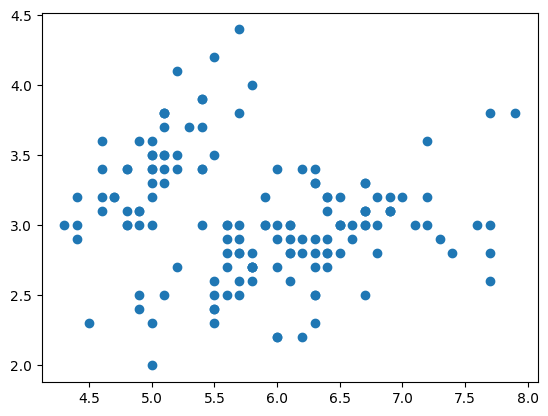

In [ ]:
plt.scatter(df.sepal_length, df.sepal_width)
plt.show()

In [ ]:
# 데이터프레임에 타겟 추가
df['target'] = iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


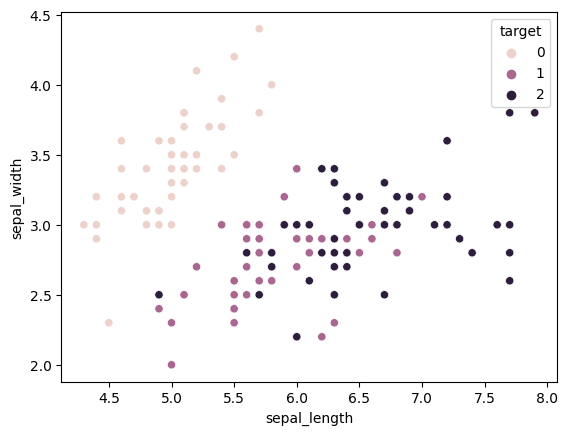

In [ ]:
# 타겟마다 다른 색으로 표현
import seaborn as sns

sns.scatterplot(data = df, x = df.sepal_length, y = df.sepal_width, hue = 'target')

plt.show()

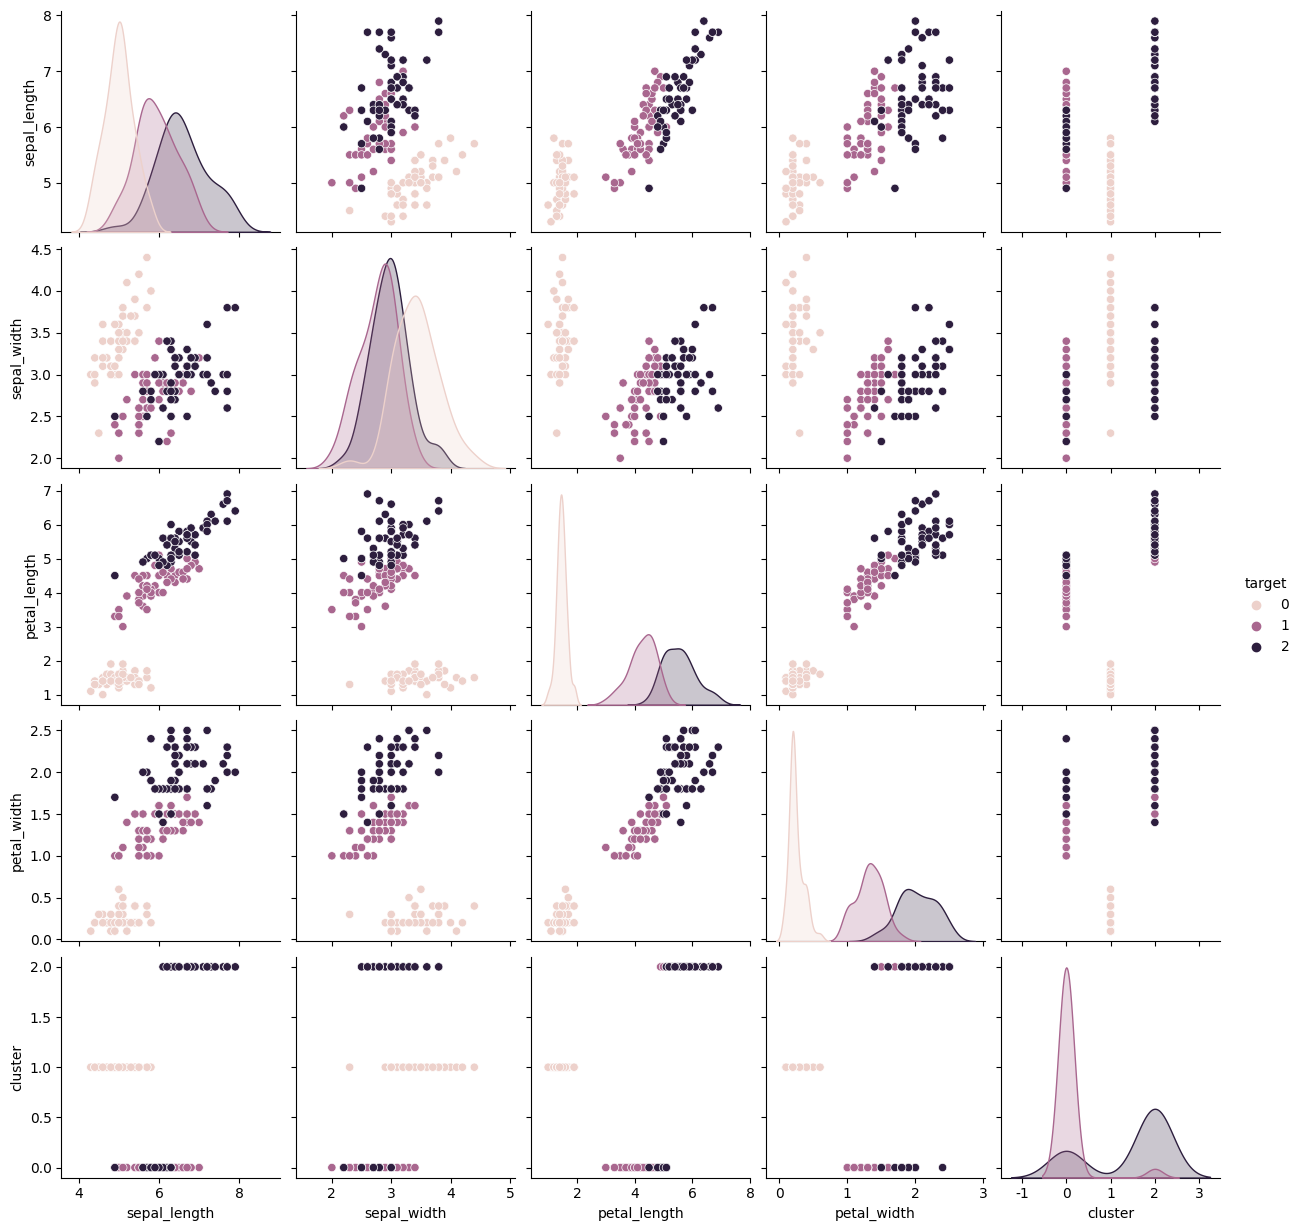

In [ ]:
sns.pairplot(df, hue = 'target')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)

model.fit(iris.data)

KMeans(n_clusters=3, random_state=0)

In [ ]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
# 학습을 통해 분류한 라벨값 데이터프레임에 추가
df['cluster'] = model.labels_
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


# 4. 차원축소 (Dimension Reduction)

1. 차원축소의 3가지 접근방법
  - 피처선택(Feature Selection) : 불필요한 피처를 버린다. 상관계수 값을 통해 판단
  - 피처추출(Feature Extraction) : 피처를 선택하는 것이 아니라 더 적은 차원으로 피처를 매핑 ex) PCA, LDA, SVD, NMF 등
  - 피처생성(Feature Enginering) : 특성공학, 데이터 테이블에 피처가 부족한 상황일 때 적용

2. PCA
  - 가장 대표적인 차원 축소 알고리즘
  - 여러 피처간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원 축소
  - PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는 것

3. PCA 수행과정
  - 입력 데이터 세트의 공분산 행렬을 생성한다.
  - 공분산 행렬의 고유벡터와 고유값을 계산한다.
  - 고유값이 가장 큰 순으로 k개(PCA의 변환 차수)만큼 고유벡터를 추출한다.
  - 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.



In [ ]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y = True)   # True : 데이터와 타겟을 분리해서 로드

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(iris.data, columns = columns)
iris_df['target'] = iris.target

In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 4-1. 각 클래스별 데이터의 분포를 시각화
- sepal_length와 sepal_width

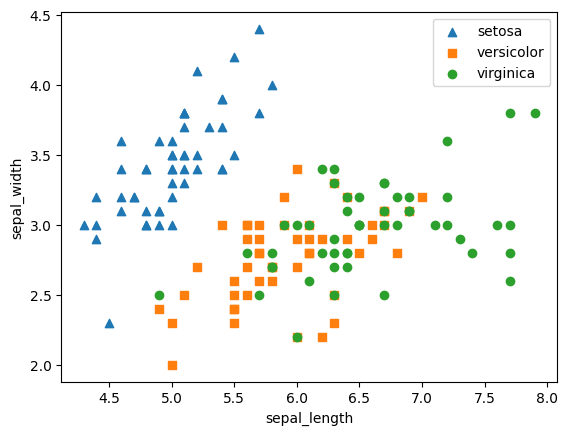

In [ ]:
markers = ['^', 's', 'o']
# target = 0(setosa), 1(versicolor), 2(verginica)

for i, marker in enumerate(markers) :
  xpas = iris_df[iris_df.target == i]['sepal_length']
  ypas = iris_df[iris_df.target == i]['sepal_width']
  plt.scatter(xpas, ypas, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()


In [ ]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

iris_df_input = iris_df.iloc[:, :-1]
iris_scaled = StandardScaler().fit_transform(iris_df_input)
iris_scaled_df = pd.DataFrame(iris_scaled)
iris_scaled_df['target'] = iris_df.target
iris_scaled_df.describe()

,0,1,2,3,target
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-1.468455e-15,-1.823726e-15,-1.610564e-15,-9.473903e-16,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,0.000000
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,0.000000
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,1.000000
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,2.000000
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,2.000000


In [ ]:
# PCA를 이용한 차원축소
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [ ]:
# 축소한 데이터 확인
iris_scaled_df['pca_x'] = iris_pca[:, 0]
iris_scaled_df['pca_y'] = iris_pca[:, 1]
iris_scaled_df.head()

,0,1,2,3,target,pca_x,pca_y
0,-0.900681,1.019004,-1.340227,-1.315444,0,-2.264703,0.480027
1,-1.143017,-0.131979,-1.340227,-1.315444,0,-2.080961,-0.674134
2,-1.385353,0.328414,-1.397064,-1.315444,0,-2.364229,-0.341908
3,-1.506521,0.098217,-1.283389,-1.315444,0,-2.299384,-0.597395
4,-1.021849,1.249201,-1.340227,-1.315444,0,-2.389842,0.646835


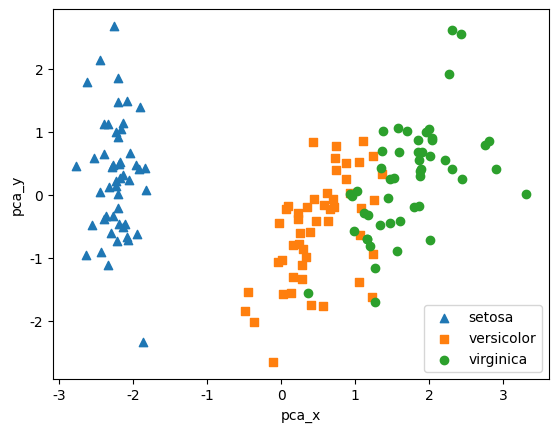

In [ ]:
# 시각화
markers = ['^', 's', 'o']

for i, marker in enumerate(markers) :
  xpas = iris_scaled_df[iris_scaled_df.target == i]['pca_x']
  ypas = iris_scaled_df[iris_scaled_df.target == i]['pca_y']
  plt.scatter(xpas, ypas, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('pca_x')
plt.ylabel('pca_y')
plt.show()


In [ ]:
# component 변동성이 반영된 변동 비율
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

0.729... + 0.228... = 0.95.....   전체 데이터의 약 95% 변동성 반영

## 4-2. PCA 변환 전/후 랜덤포레스트로 분류

In [ ]:
# 차원축소 전
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score # 교차검증의 정확도
# 분류모델
rf = RandomForestClassifier(random_state = 2023)
# 교차검증
scores = cross_val_score(rf, iris_df.iloc[:,  :-1], iris_df.target, scoring = 'accuracy', cv = 3)
# 정확도
print(f'원본 데이터의 fold별 정확도 : {scores}')
print(f'원본 데이터의 평균 정확도 : {np.mean(scores):.3f}')

원본 데이터의 fold별 정확도 : [0.98 0.94 0.98]
원본 데이터의 평균 정확도 : 0.967


In [ ]:
# PCA 변환 후 데이터만 담고 있는 데이터프레임 생성
pca_columns = ['pca_component_1', 'pca_component_2']
iris_df_pca = pd.DataFrame(iris_pca, columns = pca_columns)
iris_df_pca['target'] = iris.target
iris_df_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [ ]:
# 차원축소 후
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score # 교차검증의 정확도
# 분류모델
rcf = RandomForestClassifier(random_state = 2023)
# 교차검증
scores = cross_val_score(rcf, iris_df_pca.iloc[:, :-1], iris_df_pca.target, scoring = 'accuracy', cv = 3)
# 정확도
print(f'원본 데이터의 fold별 정확도 : {scores}')
print(f'원본 데이터의 평균 정확도 : {np.mean(scores):.3f}')

원본 데이터의 fold별 정확도 : [0.88 0.88 0.9 ]
원본 데이터의 평균 정확도 : 0.887


# 5. 계층적 군집분석

- k-means 군집화와 달리 군집 수를 사전에 정하지 않아도 된다.
- 탐색 : Dendogramm을 이용해 군집 수를 결정한다.
- 확인 : k-means
- 거리와 유사도를 기반으로 클러스터를 형성하는 알고리즘
- 연결방법
  1. single Linkage - 두 클러스터 내의 가장 가까운 점 사이의 거리
  2. complete Linkage - 두 클러스터 내의 가장 먼 점 사이의 거리
  3. average Linkage - 두 클러스터 내의 모든 점 사이의 평균 거리

In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# 계층적 군집분석, 완전연결(최장거리법)
cluster = linkage(y = iris_df, method = 'complete', metric = 'euclidean')    # method : 연결 방법 / metric : 거리 계산 방법
cluster.shape

(149, 4)

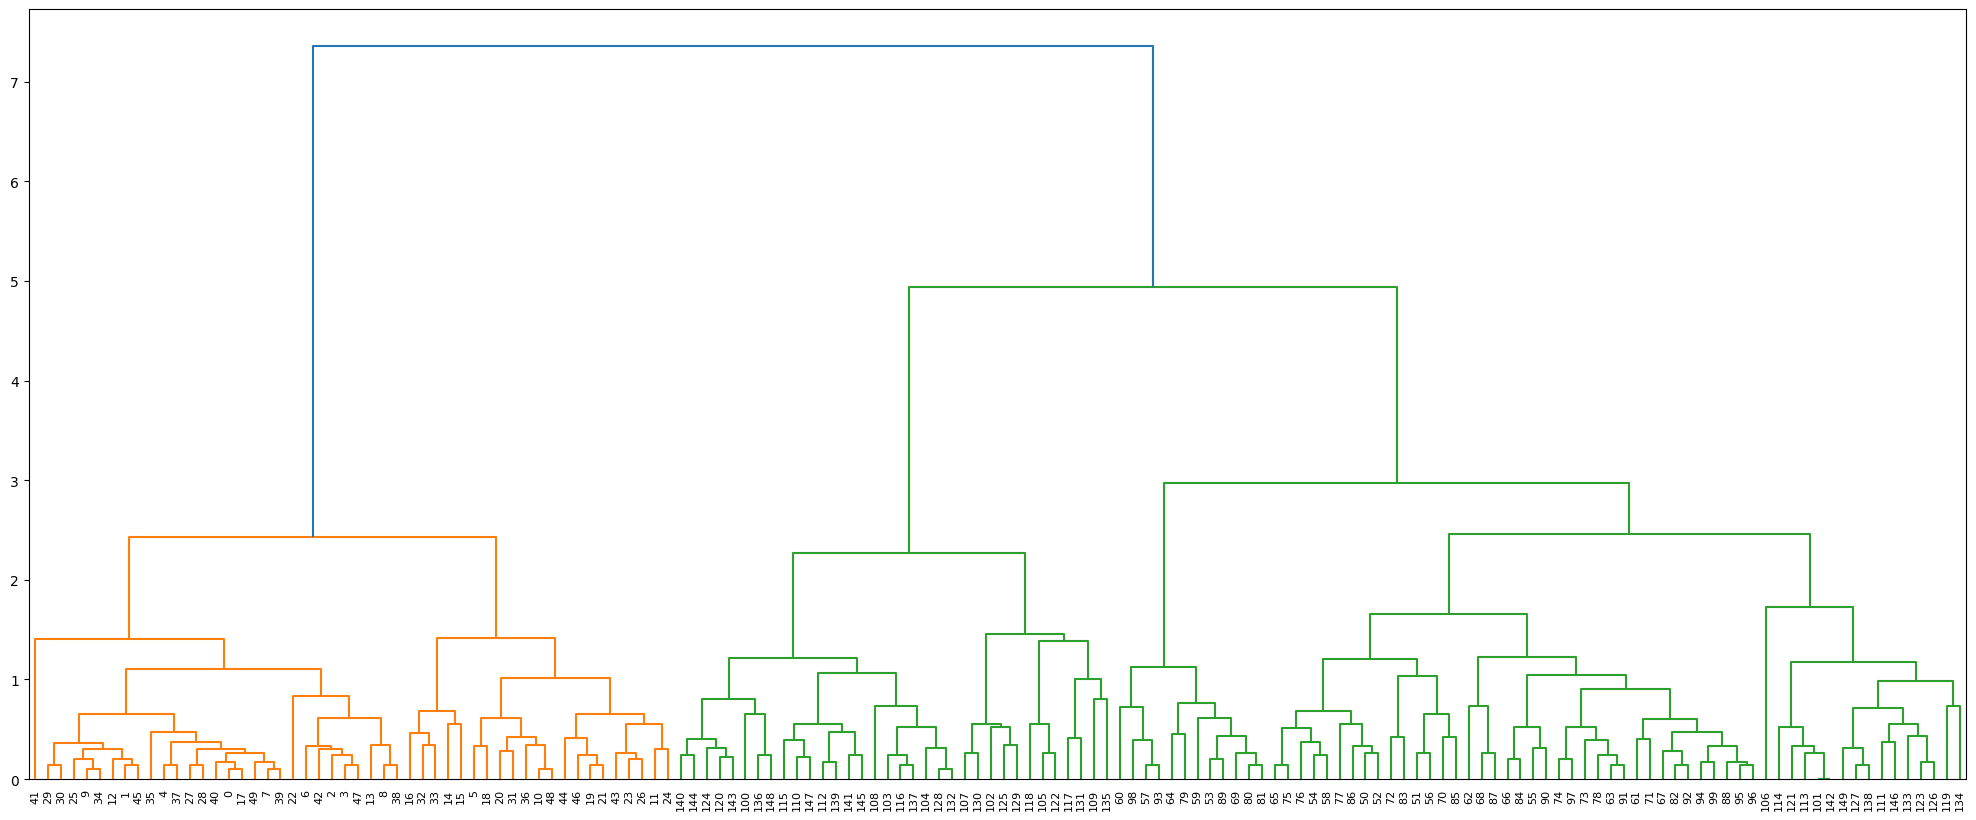

In [ ]:
# 군집 수 결정

plt.figure(figsize = (25, 10))

# leaf_rotation : 글자 각도
# leaf_font_size : 글자 크기
dendrogram(cluster, leaf_font_size = 8)
plt.show()
# 덴도그램의 y축 : 군집 수

In [ ]:
# 클러스터링 결과 확인
## 내가 덴도그램을 통해 군집할 클러스터의 수를 지정하고 예측

from scipy.cluster.hierarchy import fcluster

cut = fcluster(cluster, t = 3, criterion = 'distance') # t = 지정한 클러스터 수
cut#(예측값)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [ ]:
# 정답
labels = iris_df['target']

df = pd.DataFrame({'pred' : cut, 'labels' : labels})
df

,pred,labels
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
145,2,2
146,3,2
147,2,2
148,2,2


In [ ]:
result = pd.crosstab(df['pred'], df['labels'])
result

labels,0,1,2
pred,,,
1,50,0,0
2,0,0,34
3,0,50,16


In [ ]:
iris_df['pred'] = cut

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,pred
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [ ]:
iris_df['pred'].value_counts()

3    66
1    50
2    34
Name: pred, dtype: int64

## 5-1. k-means

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(iris_df.iloc[:, :4])

KMeans(n_clusters=3, random_state=0)

In [ ]:
# k-means의 예측값
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)